In [1]:
import pandas as pd 
import numpy as np
import talib as ta
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

D:\Anaconda\Conda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
stocks=['HDFCBANK.NS','TATAMOTORS.NS','ITC.NS','ULTRACEMCO.NS','CIPLA.NS', 'TITAN.NS']

In [3]:
df=yf.download(stocks,start='2015-04-01',end='2017-03-31',progress=False)['Adj Close']
df.head()

,CIPLA.NS,HDFCBANK.NS,ITC.NS,TATAMOTORS.NS,TITAN.NS,ULTRACEMCO.NS
Date,,,,,,
2015-04-01,689.644409,489.981445,176.924301,558.678955,373.273071,2822.559570
2015-04-06,714.961792,489.364929,181.474457,567.920044,385.893951,2831.221924
2015-04-07,707.721436,489.744354,181.261566,560.123108,388.762299,2869.688965
2015-04-08,715.982300,491.072174,184.268433,561.272705,389.575043,2923.131104
2015-04-09,699.217407,500.817169,184.747391,559.673340,382.404114,2901.108154


In [4]:
returns=df.pct_change()
returns.tail()

,CIPLA.NS,HDFCBANK.NS,ITC.NS,TATAMOTORS.NS,TITAN.NS,ULTRACEMCO.NS
Date,,,,,,
2017-03-24,-0.003857,-0.004578,0.012248,-0.005287,-0.008960,-0.000076
2017-03-27,-0.003115,-0.010180,0.002135,-0.012011,0.000000,-0.005712
2017-03-28,0.003462,0.007341,-0.003906,0.016460,0.012725,0.009124
2017-03-29,-0.001683,0.005915,0.009626,-0.007091,0.002976,0.003022
2017-03-30,0.008767,0.026320,-0.001589,-0.001386,0.005055,-0.002725


### Covariance Matrix

In [5]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,CIPLA.NS,HDFCBANK.NS,ITC.NS,TATAMOTORS.NS,TITAN.NS,ULTRACEMCO.NS
CIPLA.NS,0.000261,0.000061,0.000066,0.000082,0.000066,0.000086
HDFCBANK.NS,0.000061,0.000104,0.000058,0.000089,0.000049,0.000075
ITC.NS,0.000066,0.000058,0.000247,0.000109,0.000060,0.000072
TATAMOTORS.NS,0.000082,0.000089,0.000109,0.000598,0.000134,0.000166
TITAN.NS,0.000066,0.000049,0.000060,0.000134,0.000346,0.000089
ULTRACEMCO.NS,0.000086,0.000075,0.000072,0.000166,0.000089,0.000272


### Correlation Matrix

In [6]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,CIPLA.NS,HDFCBANK.NS,ITC.NS,TATAMOTORS.NS,TITAN.NS,ULTRACEMCO.NS
CIPLA.NS,1.000000,0.372774,0.261594,0.207044,0.219820,0.322065
HDFCBANK.NS,0.372774,1.000000,0.359674,0.357670,0.256977,0.448889
ITC.NS,0.261594,0.359674,1.000000,0.283427,0.204384,0.279907
TATAMOTORS.NS,0.207044,0.357670,0.283427,1.000000,0.293691,0.412066
TITAN.NS,0.219820,0.256977,0.204384,0.293691,1.000000,0.289499
ULTRACEMCO.NS,0.322065,0.448889,0.279907,0.412066,0.289499,1.000000


In [7]:
exp_returns=df.resample('Y').last().pct_change().mean()
exp_returns

CIPLA.NS        -0.034804
HDFCBANK.NS      0.169667
ITC.NS           0.141026
TATAMOTORS.NS    0.099549
TITAN.NS         0.173400
ULTRACEMCO.NS    0.199649
dtype: float64

In [8]:
volatility = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
volatility

CIPLA.NS         0.256331
HDFCBANK.NS      0.161775
ITC.NS           0.249285
TATAMOTORS.NS    0.388271
TITAN.NS         0.295336
ULTRACEMCO.NS    0.261571
dtype: float64

In [9]:
assets = pd.concat([exp_returns, volatility], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
CIPLA.NS,-0.034804,0.256331
HDFCBANK.NS,0.169667,0.161775
ITC.NS,0.141026,0.249285
TATAMOTORS.NS,0.099549,0.388271
TITAN.NS,0.173400,0.295336
ULTRACEMCO.NS,0.199649,0.261571


### Portfolio weights by Monte Carlo

In [10]:
num_portfolios = 50000
results = np.zeros((2+len(stocks),num_portfolios))

In [11]:
for i in range(num_portfolios):
    
    weights = np.array(np.random.random(6))
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(exp_returns * weights)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(252) # Annual standard deviation = volatility
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i]= ann_sd
    
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+2,i] = weights[j]


In [12]:
#convert results array to Pandas DataFrame
weights = pd.DataFrame(results.T,columns=['Returns','Volatility',stocks[0]+' weight',stocks[1]+' weight',stocks[2]+' weight',
                                          stocks[3]+' weight',stocks[4]+' weight',stocks[5]+' weight'])
weights.head()

,Returns,Volatility,HDFCBANK.NS weight,TATAMOTORS.NS weight,ITC.NS weight,ULTRACEMCO.NS weight,CIPLA.NS weight,TITAN.NS weight
0,0.124229,0.160922,0.188048,0.246230,0.235177,0.039570,0.236241,0.054733
1,0.144167,0.181091,0.129570,0.140473,0.091734,0.112569,0.161766,0.363888
2,0.084591,0.200856,0.302013,0.047982,0.217178,0.295402,0.019438,0.117986
3,0.127732,0.167616,0.168639,0.219703,0.151897,0.128578,0.153011,0.178172
4,0.103251,0.174756,0.247015,0.198811,0.173386,0.194629,0.109587,0.076572


In [13]:
min_vol_point = weights.iloc[weights['Volatility'].idxmin()]
min_vol_point

Returns                 0.134315
Volatility              0.148482
HDFCBANK.NS weight      0.162960
TATAMOTORS.NS weight    0.473372
ITC.NS weight           0.170782
ULTRACEMCO.NS weight    0.000244
CIPLA.NS weight         0.110419
TITAN.NS weight         0.082223
Name: 16072, dtype: float64

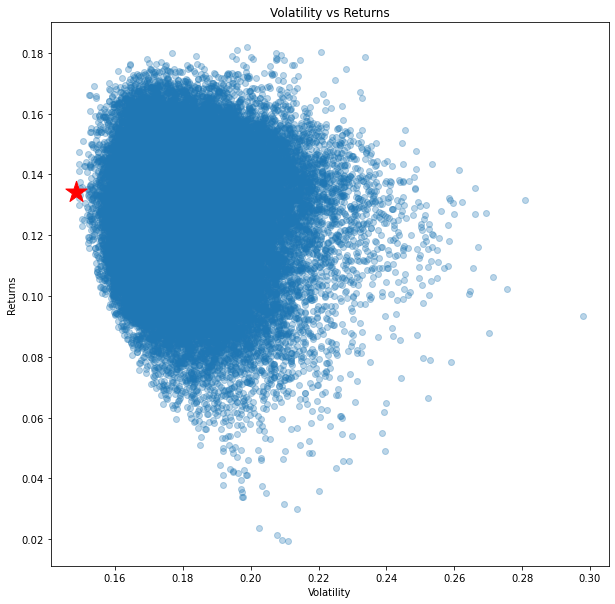

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(data=weights, x='Volatility', y='Returns', marker='o',alpha=0.3)
plt.scatter(min_vol_point[1],min_vol_point[0], color='r', marker='*', s=500)
ax.set_title(f"Volatility vs Returns")
ax.set_xlabel(f"Volatility")
ax.set_ylabel(f"Returns")
fig.show()

### Maximium Sharpe Ratio

In [15]:
rf = 0.01 # risk factor
sharpe_ratio= (weights['Returns']-rf)/weights['Volatility']
weights['Sharpe Ratio']=sharpe_ratio
weights.head()

,Returns,Volatility,HDFCBANK.NS weight,TATAMOTORS.NS weight,ITC.NS weight,ULTRACEMCO.NS weight,CIPLA.NS weight,TITAN.NS weight,Sharpe Ratio
0,0.124229,0.160922,0.188048,0.246230,0.235177,0.039570,0.236241,0.054733,0.709842
1,0.144167,0.181091,0.129570,0.140473,0.091734,0.112569,0.161766,0.363888,0.740881
2,0.084591,0.200856,0.302013,0.047982,0.217178,0.295402,0.019438,0.117986,0.371364
3,0.127732,0.167616,0.168639,0.219703,0.151897,0.128578,0.153011,0.178172,0.702393
4,0.103251,0.174756,0.247015,0.198811,0.173386,0.194629,0.109587,0.076572,0.533609


In [16]:
max_sharpe_point = weights.iloc[weights['Sharpe Ratio'].idxmax()]
max_sharpe_point 

Returns                 0.169199
Volatility              0.153712
HDFCBANK.NS weight      0.010678
TATAMOTORS.NS weight    0.568821
ITC.NS weight           0.092332
ULTRACEMCO.NS weight    0.027051
CIPLA.NS weight         0.105581
TITAN.NS weight         0.195537
Sharpe Ratio            1.035699
Name: 1143, dtype: float64

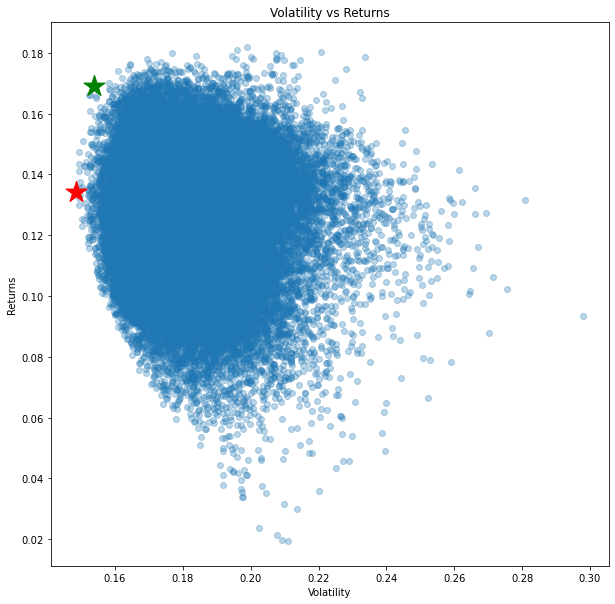

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(data=weights, x='Volatility', y='Returns', marker='o',alpha=0.3)
plt.scatter(max_sharpe_point[1],max_sharpe_point[0], color='g', marker='*', s=500)
plt.scatter(min_vol_point[1],min_vol_point[0], color='r', marker='*', s=500)
ax.set_title(f"Volatility vs Returns")
ax.set_xlabel(f"Volatility")
ax.set_ylabel(f"Returns")
fig.show()

In [18]:
test_df=yf.download(stocks,start='2017-04-01',end='2019-03-31',progress=False)['Adj Close']
test_df.sort_index(inplace=True)
test_df.head()

,CIPLA.NS,HDFCBANK.NS,ITC.NS,TATAMOTORS.NS,TITAN.NS,ULTRACEMCO.NS
Date,,,,,,
2017-04-03,579.595337,690.371887,230.534042,470.399994,444.959503,3963.961426
2017-04-05,579.986511,689.962463,228.405136,473.500000,476.344391,4017.611572
2017-04-06,577.297058,692.924866,224.433929,473.200012,472.130737,4047.045654
2017-04-07,577.003662,693.093445,223.246674,468.299988,470.193359,4017.365479
2017-04-10,576.661438,690.829468,223.983566,474.899994,470.532410,3995.610107


In [19]:
test_returns=test_df.resample('Y').last().pct_change().mean()
test_volatility=test_df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
test_cov_matrix=test_df.pct_change().apply(lambda x: np.log(1+x)).cov()
test_weights=max_sharpe_point[2:8]
test_weights=np.array(test_weights)
test_weights

array([0.01067807, 0.56882109, 0.09233193, 0.02705091, 0.10558143,
       0.19553657])

In [20]:
test_portfolio_return = np.sum(test_returns * test_weights)
var = test_cov_matrix.mul(test_weights, axis=0).mul(test_weights, axis=1).sum().sum()
sd = np.sqrt(var)
ann_sd = sd*np.sqrt(252)
test_portfolio_std_dev = ann_sd
print('test return is '+str(test_portfolio_return))
print('test std dev is '+str(test_portfolio_std_dev))   

test return is 0.06943186874621049
test std dev is 0.12688585208888511


In [21]:
test_weights=min_vol_point[2:8]
test_weights=np.array(test_weights)
test_weights

array([1.62959598e-01, 4.73371871e-01, 1.70781770e-01, 2.43976449e-04,
       1.10419462e-01, 8.22233233e-02])

In [22]:
test_portfolio_return = np.sum(test_returns * test_weights)
var = test_cov_matrix.mul(test_weights, axis=0).mul(test_weights, axis=1).sum().sum()
sd = np.sqrt(var)
ann_sd = sd*np.sqrt(252)
test_portfolio_std_dev = ann_sd
print('test return is '+str(test_portfolio_return))
print('test std dev is '+str(test_portfolio_std_dev))  

test return is 0.06913096835394011
test std dev is 0.1230443949538531


## Q.) How did you choose the Stocks?

The stocks were chosen such that the portfolio created could have minimum variance. So for this stocks were chosen from different sectors so that if one sector is down at a time it could be cover up by stocks of other sectors and thus minimizing the risk.

## Q.) What is the impact of increasing the number of stocks in the portfolio?

Increasing the number of stocks with proper diversification can help in reducing the overall risk of the portfolio but this is only upto a certain number of stocks.

## Q.) Why are calculating the weights by optimization and not giving equal weightage to every stock?

Giving equal weightage or random weights to the stock in the portfolio may be very risky and will not maximize our return that we could have get by calculating the weights by optimization.

## Q.) Which parameters are you using to check the accuracy of your model

The Sharpe ratio